In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [3]:


#path = r"C:\Users\Ashwaq Ahmed\Documents\pythoncode\MAjor\pythonProject2\agri_data_img"
path = r"C:/Users/Ashwaq Ahmed/Documents/pythoncode/MAjor/pythonProject2/agri_data_img/"


df = pd.read_csv(r"C:/Users/Ashwaq Ahmed/Documents/pythoncode/MAjor/pythonProject2/pascal_voc_format.csv")

In [4]:

df.head()

filename  width  height class  xmin  ymin  xmax  ymax  \
0  agri_0_1009.jpeg    512     512  weed   172   119   449   391   
1  agri_0_1017.jpeg    512     512  weed     8     4   500   390   
2  agri_0_1018.jpeg    512     512  weed    20    84   434   409   
3  agri_0_1020.jpeg    512     512  weed    66    23   440   336   
4  agri_0_1024.jpeg    512     512  weed   161    76   453   381   

                                                path  
0  C:\Users\Ashwaq Ahmed\Documents\pythoncode\MAj...  
1  C:\Users\Ashwaq Ahmed\Documents\pythoncode\MAj...  
2  C:\Users\Ashwaq Ahmed\Documents\pythoncode\MAj...  
3  C:\Users\Ashwaq Ahmed\Documents\pythoncode\MAj...  
4  C:\Users\Ashwaq Ahmed\Documents\pythoncode\MAj...

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2072 entries, 0 to 2071
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  2072 non-null   object
 1   width     2072 non-null   int64 
 2   height    2072 non-null   int64 
 3   class     2072 non-null   object
 4   xmin      2072 non-null   int64 
 5   ymin      2072 non-null   int64 
 6   xmax      2072 non-null   int64 
 7   ymax      2072 non-null   int64 
 8   path      2072 non-null   object
dtypes: int64(6), object(3)
memory usage: 145.8+ KB


In [6]:
folder_images = os.listdir(path)
len(folder_images)

1300

In [7]:
train_images = folder_images[:1000]
test_images = folder_images[1000:]
j=0
for i in tqdm(list(df['filename'].unique())):
    if i in folder_images:
        j+=1
print(j)  

100%|██████████| 1300/1300 [00:00<00:00, 25491.92it/s]

1300


##### Visulaizing the Dataset

16it [00:00, 85.23it/s]


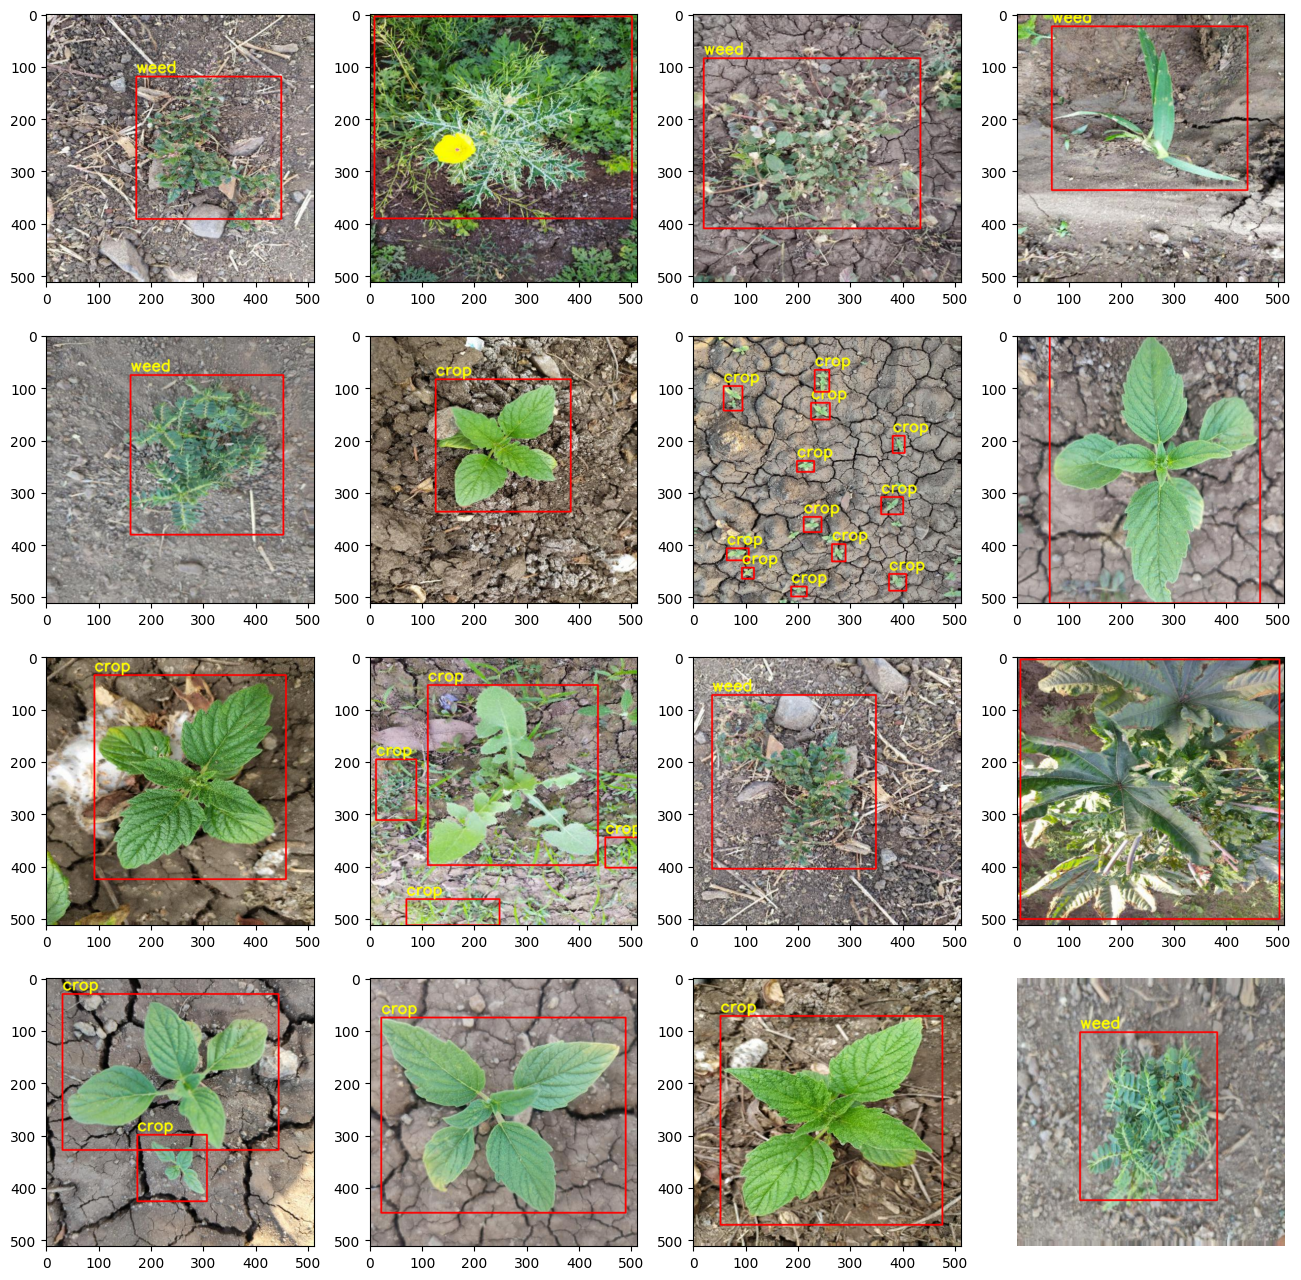

In [8]:
_ , axes = plt.subplots(4,4,figsize=(16,16))
for i,ax in tqdm(zip(range(16),axes.flat)):
    temp_df = df[df['filename']==folder_images[i]].reset_index(drop=True)
    temp_img = cv2.imread(path+folder_images[i])
    temp_img = cv2.cvtColor(temp_img, cv2.COLOR_BGR2RGB)
    for j in range(len(temp_df)):
        rect = cv2.rectangle(temp_img,(temp_df.loc[j,'xmin'],temp_df.loc[j,'ymin']),(temp_df.loc[j,'xmax'],temp_df.loc[j,'ymax']),(255,0,0),2,cv2.LINE_AA)
        rect_text = cv2.putText(rect,temp_df.loc[j,'class'],(temp_df.loc[j,'xmin'],temp_df.loc[j,'ymin']-8), cv2.FONT_HERSHEY_SIMPLEX,1, (255,255,0), 2, cv2.LINE_AA)
    ax.imshow(rect_text)
    plt.axis('off')

##### Selective Search

In [9]:
cv2.setUseOptimized(True); #turns on or off the optimised code in opencv
ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()

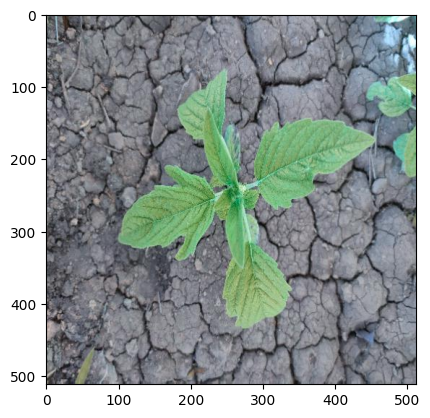

In [10]:
img = cv2.imread(path+folder_images[45])
ss.setBaseImage(img) # setting the base image
ss.switchToSelectiveSearchFast() # setting the image for selective search
rects = ss.process()
plt.imshow(img)

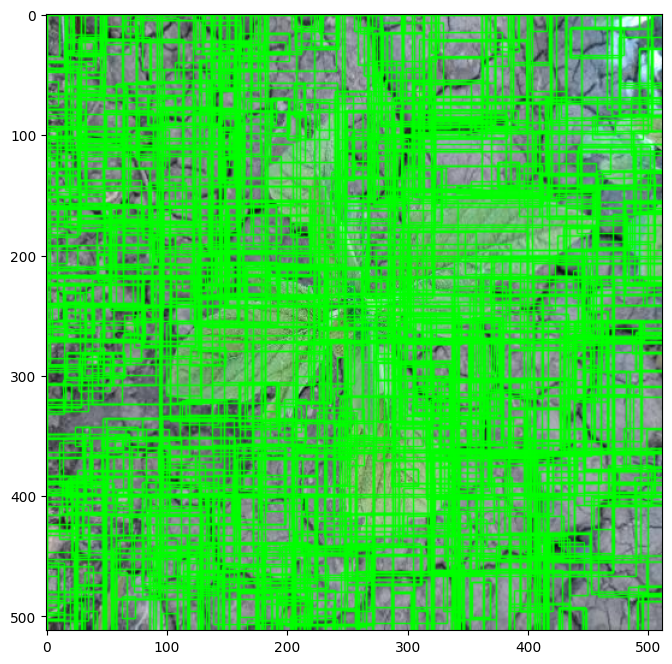

In [11]:
sel_rects = rects[:1200] # only taking the first 1200 rectangles into consideration
imOut = img.copy()
for i, rect in (enumerate(sel_rects)):
    x, y, w, h = rect
    cv2.rectangle(imOut, (x, y), (x+w, y+h), (0, 255, 0), 1, cv2.LINE_AA)
plt.figure(figsize=(8,8))
plt.imshow(imOut)

In [12]:
from region_proposals import iou_filter

In [13]:
ss,neg =iou_filter(path+folder_images[1280],df,thresh=0.5)
print(ss)
print(neg)

[[[106, 186, 291, 198], 'weed'], [[64, 243, 341, 102], 'weed'], [[126, 232, 249, 159], 'weed'], [[162, 232, 213, 159], 'weed'], [[166, 233, 214, 112], 'weed'], [[159, 212, 221, 133], 'weed'], [[133, 233, 247, 167], 'weed'], [[106, 186, 291, 158], 'weed'], [[160, 249, 220, 142], 'weed'], [[126, 187, 268, 214], 'weed'], [[166, 233, 214, 155], 'weed'], [[162, 225, 156, 176], 'weed'], [[126, 221, 249, 170], 'weed'], [[135, 232, 151, 159], 'weed'], [[126, 221, 249, 180], 'weed'], [[126, 232, 249, 169], 'weed'], [[68, 211, 324, 189], 'weed'], [[162, 249, 218, 142], 'weed'], [[133, 233, 259, 167], 'weed'], [[146, 225, 172, 176], 'weed'], [[106, 186, 291, 162], 'weed'], [[68, 233, 312, 167], 'weed'], [[140, 243, 265, 102], 'weed'], [[133, 211, 259, 189], 'weed'], [[159, 212, 221, 162], 'weed'], [[140, 212, 240, 183], 'weed'], [[98, 128, 299, 256], 'weed'], [[162, 225, 156, 166], 'weed'], [[160, 249, 220, 152], 'weed'], [[68, 233, 313, 167], 'weed'], [[107, 129, 268, 272], 'weed']]
[[231, 225, 

##### Showing the positive sections

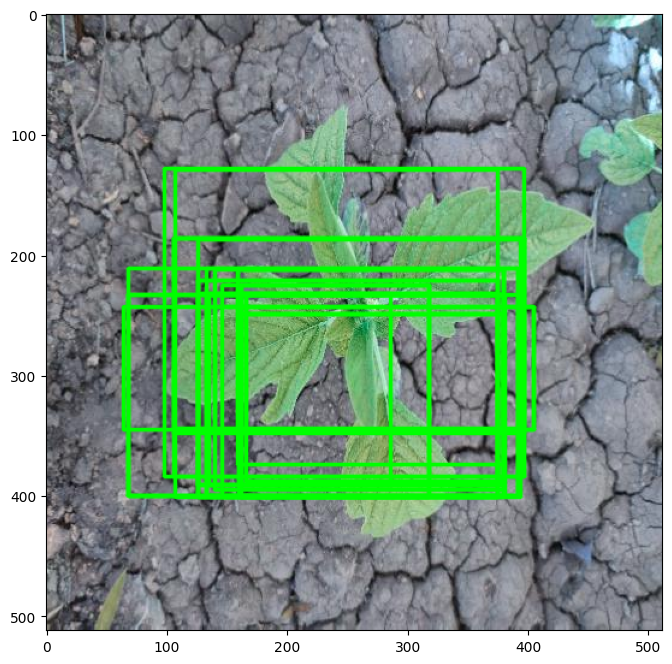

In [14]:
img = cv2.imread(path+folder_images[45])
for i, rect in (enumerate(ss)):
    x, y, w, h = rect[0]
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2, cv2.LINE_AA)
    
plt.figure(figsize=(12,8))
plt.imshow(img)

In [15]:
len(ss)



31

In [16]:
len(neg)

62

##### Showing negative sections


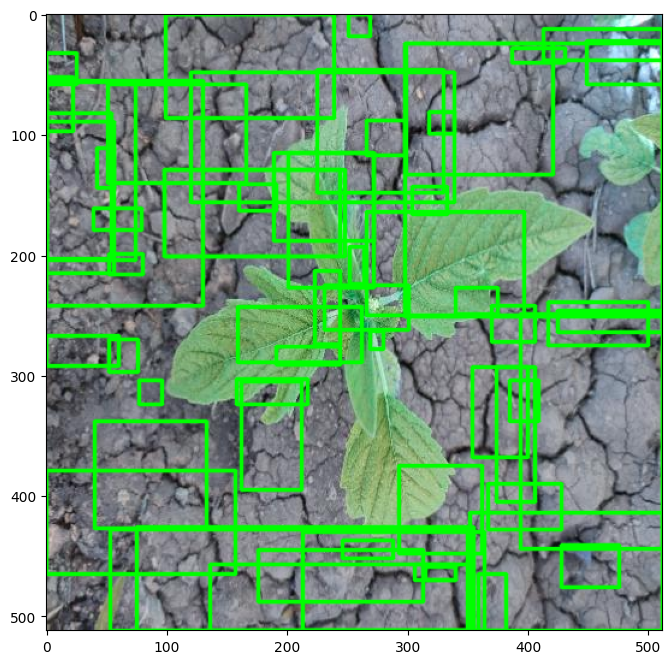

In [17]:
img = cv2.imread(path+folder_images[45])
for i, rect in (enumerate(neg)):
    x, y, w, h = rect
    
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2, cv2.LINE_AA)
    
    
plt.figure(figsize=(12,8))
plt.imshow(img)

In [18]:
train_data = {}
test_data  = {}

In [19]:
for i,img in tqdm(enumerate(train_images)):
    ss,neg =iou_filter(path + img , df , thresh=0.5)
    train_data[img] = {'region_proposal':ss,'negative_example':neg}

1000it [25:01:19, 90.08s/it]  


In [20]:
for i,img in tqdm(enumerate(test_images)):
    ss,neg =iou_filter(path + img , df , thresh=0.5)
    test_data[img] = {'region_proposal':ss,'negative_example':neg}

300it [39:34,  7.92s/it]


In [21]:
#converting numpy instantant into python datatype
import json
class MyEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.integer):
            return int(obj)
        elif isinstance(obj, np.floating):
            return float(obj)
        elif isinstance(obj, np.ndarray):
            return obj.tolist()
        else:
            return super(MyEncoder, self).default(obj)

In [22]:

with open('train.json','w+') as output_file:
    json.dump(train_data,output_file,cls=MyEncoder)

In [23]:

with open('test.json','w+') as output_file:
    json.dump(test_data,output_file,cls=MyEncoder)

##### Checking conversion is correct

In [24]:
with open('train.json') as train:
    train_json = json.load(train)

In [25]:
with open('test.json') as test:
    test_json = json.load(test)

In [26]:
train_json == train_data

True

In [27]:
test_json == test_data

True